# Projet Série Temporelles
*AHOUMENOU Onel, DEVIGNAC Vladimir, DURAND Arnaud*

## Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Importation des données

data = pd.read_csv("air_pollution.csv", index_col='date', parse_dates=True)
data.head()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
date,,,,,,,,
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [466]:
pollution_today = data['pollution_today']
moyennes_mensuelles = pollution_today.resample('ME').mean()

C:\Users\yoshi\AppData\Local\Temp\ipykernel_1492\648368512.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X.append(data[k])
C:\Users\yoshi\AppData\Local\Temp\ipykernel_1492\648368512.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S+=1/2*(data[i-m]+data[i+m])
C:\Users\yoshi\AppData\Local\Temp\ipykernel_1492\648368512.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S+=data[j]
C:\Users\yoshi\AppData\Local\Temp\ipykerne

Text(0.5, 1.0, 'series avec valeurs saisonnières corrigés')

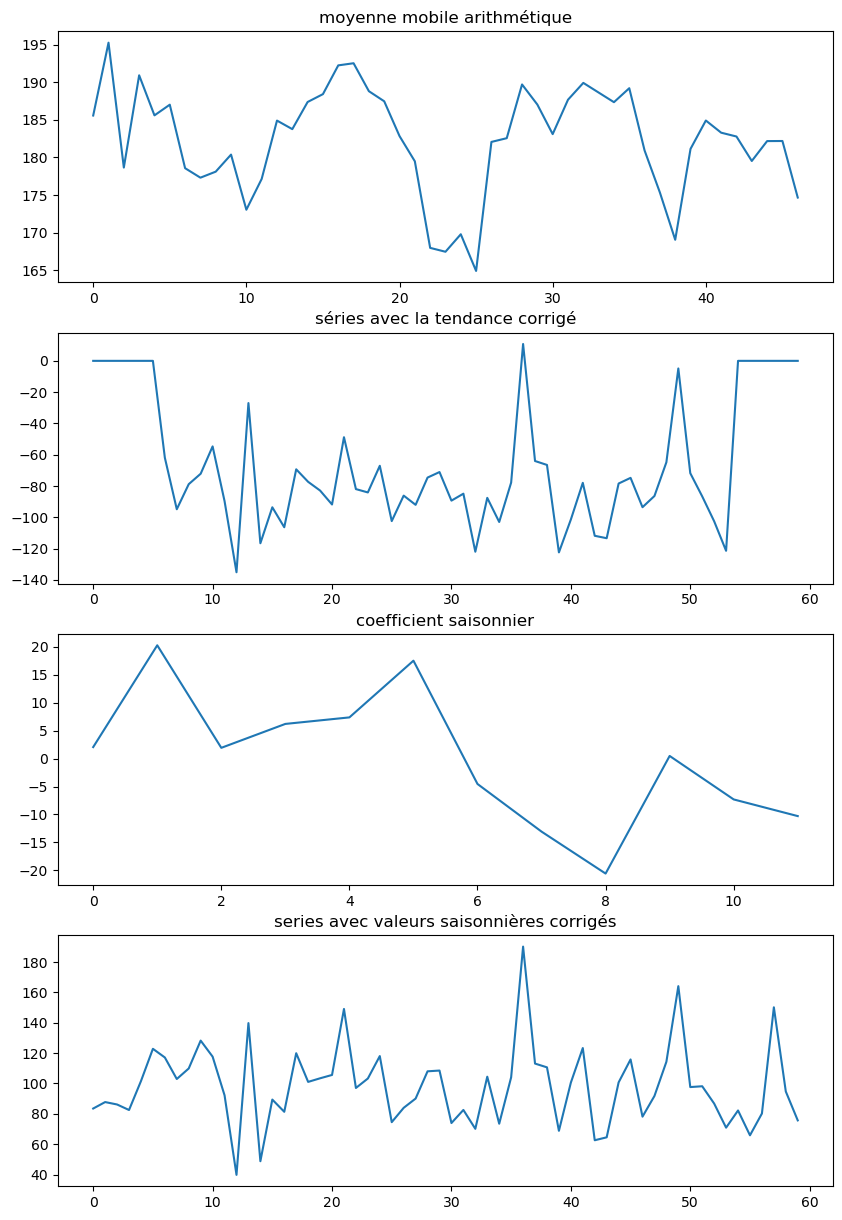

In [560]:
moyennes_mensuelles = pollution_today.resample('ME').mean()

def parite(n): #Pour les entiers jusqu'à environ 5000
    if n==1:
        return "impair"
    elif n==0:
        return "pair"
    return parite(n-2)

def moyenne_mobile_arithmétique(data,P):
    if parite(P)=="impair":
        return "erreur sur P" #Cas impair non traité
    elif parite(P)=="pair":
        ordre=P+1
        m=int(P/2)
        X=[]
        for k in range(m):
            X.append(data[k])
        for i in range(m,len(data)-m):
            S=0
            S+=1/2*(data[i-m]+data[i+m])
            for j in range(i-m+1,i+m-1):
                S+=data[j]
            S/=m
            X.append(S)
        for l in range(len(data)-m,len(data)):
            X.append(data[l])
    return X

MMA=moyenne_mobile_arithmétique(moyennes_mensuelles,12)

series_tendance_corrigé=[moyennes_mensuelles[i]-MMA[i] for i in range(len(MMA))]

def coeff_saisonnier(data,P,N):
    estim_coeff=[]
    for j in range(0,P):
        S=0
        for i in range(1,N-1):
            S+=data[j+P*(i-1)]
        estim_coeff.append(S/(N-1))
    coeff=[]
    for k in range(len(estim_coeff)):
        S2=0
        for l in range(P):
            S2+=estim_coeff[l]
        coeff.append(estim_coeff[k]-1/P*S2)
    return coeff

CS=coeff_saisonnier(moyennes_mensuelles,12,6)

def modulo(n,p):
    if 0<=n<=p:
        return n
    elif -p<=n<0:
        return -n
    return modulo(n-p,p)

series_valeurs_saisonnieres_corrigés=[moyennes_mensuelles[i]-CS[modulo(i,12)-1] for i in range(60)]

plt.figure(figsize=(10,15))

plt.subplot(411)
plt.plot(MMA[6:53])
plt.title("moyenne mobile arithmétique")

plt.subplot(412)
plt.plot(series_tendance_corrigé)
plt.title("séries avec la tendance corrigé")

plt.subplot(413)
plt.plot(coeff_saisonnier(series_tendance_corrigé,12,5))
plt.title("coefficient saisonnier")

plt.subplot(414)
plt.plot(series_valeurs_saisonnieres_corrigés)
plt.title("series avec valeurs saisonnières corrigés")

In [550]:
def modulo(n,p):
    if 0<=n<=p:
        return n
    elif -p<=n<0:
        return -n
    return modulo(n-p,p)

1

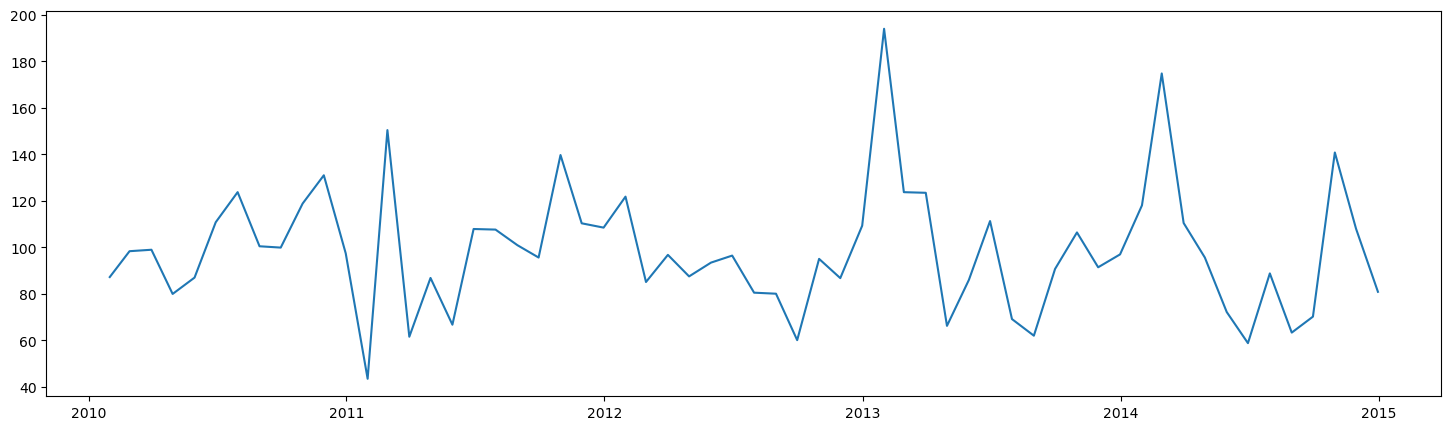

In [480]:
# Affichage de la série temporelle

#On rééchentillone de manière mensuelle: on fait la moyenne de toutes les valeurs pour chaque mois
moyennes_mensuelles = pollution_today.resample('ME').mean()

plt.figure(figsize=(18,5))
plt.plot(moyennes_mensuelles)
#Test des 3 méthodes pour savoir si on est dans un modèle additif ou multiplicatif

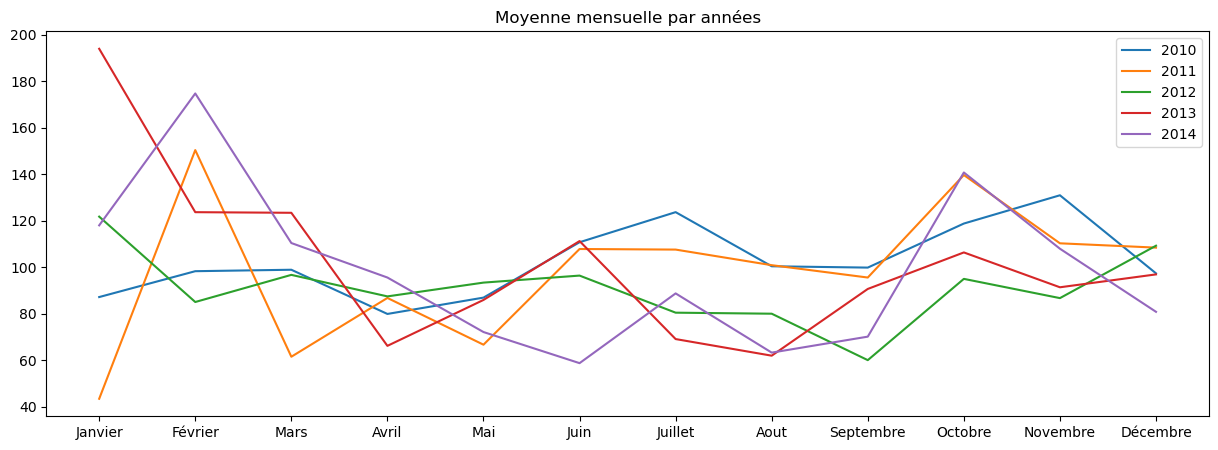

In [448]:
# Methode 1: méthode du profil
# Moyennes mensuelles par années de la série temporelle

mois = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
années = ['2010', '2011', '2012', '2013', '2014']
sep = 'ME'

plt.figure(figsize=(15, 5))
for an in années:
    plt.plot(mois, pollution_today[an].resample(sep).mean(), label=an)
plt.legend()
plt.title("Moyenne mensuelle par années")
plt.show()

# => le modèle est multiplicatif d'après cette méthode

In [ ]:
Moy=[[i] for i in range(60)]

In [516]:
# Méthode 3:
# Méthode analytique (régréssion linéaire)

from sklearn.linear_model import LinearRegression

LinearRegression().fit(moyennes_mensuelles,moy)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [17]:
# Informations utiles

pollution_today.describe()

count    1825.000000
mean       98.245080
std        76.807697
min         3.166667
25%        42.333333
50%        79.166667
75%       131.166667
max       541.895833
Name: pollution_today, dtype: float64

In [18]:
# Nombre de valeurs manquantes

pollution_today.isna().sum()

0

## Gestion de la non-stationnarité <a id="partie2"></a>

In [20]:
y_train = data['pollution_today']['2010':'2014-11']
y_test = data['pollution_today']['2014-11':]

pollution = y_train

### Isolation de la tendance

Nous allons isoler la tendance à l'aide d'une moyenne mobile d'ordre 7 (pour 7 jours par semaines)

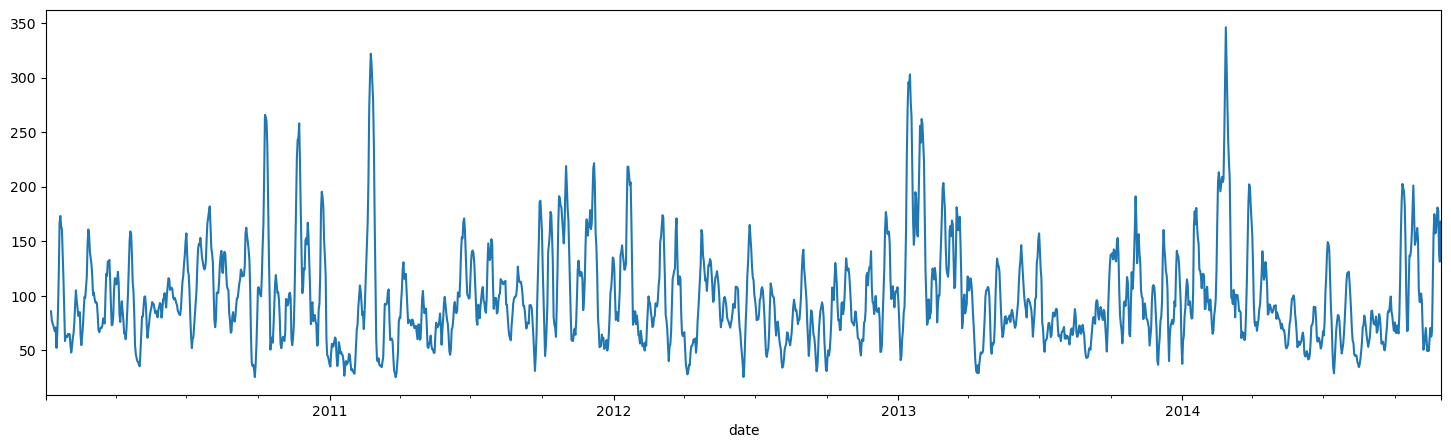

In [23]:
p = 7  # période

tendance_isolee = pollution.rolling(window=p).mean()

plt.figure(figsize=(18, 5))
tendance_isolee.plot()
plt.show()

### Estimation de la saisonnalité

A l'aide de la tendance obtenue précédemment, nous allons determiner la série corrigée de la tendance, notée ici **serie_corrigee_tendance**, puis calculer les coefficients de saisonnalité.

In [26]:
# Saisonnalité

serie_corrigee_tendance = pollution - tendance_isolee
saisonnalite = [np.mean([serie_corrigee_tendance[j] for j in range(p-1, len(pollution)) if j%p == i]) for i in range(p)]

moy = np.mean(saisonnalite)
for i in range(len(saisonnalite)):
    saisonnalite[i] = saisonnalite[i] - moy
sum(saisonnalite)

C:\Users\yoshi\AppData\Local\Temp\ipykernel_1492\2408165882.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  saisonnalite = [np.mean([serie_corrigee_tendance[j] for j in range(p-1, len(pollution)) if j%p == i]) for i in range(p)]


2.220446049250313e-16

<Axes: xlabel='date'>

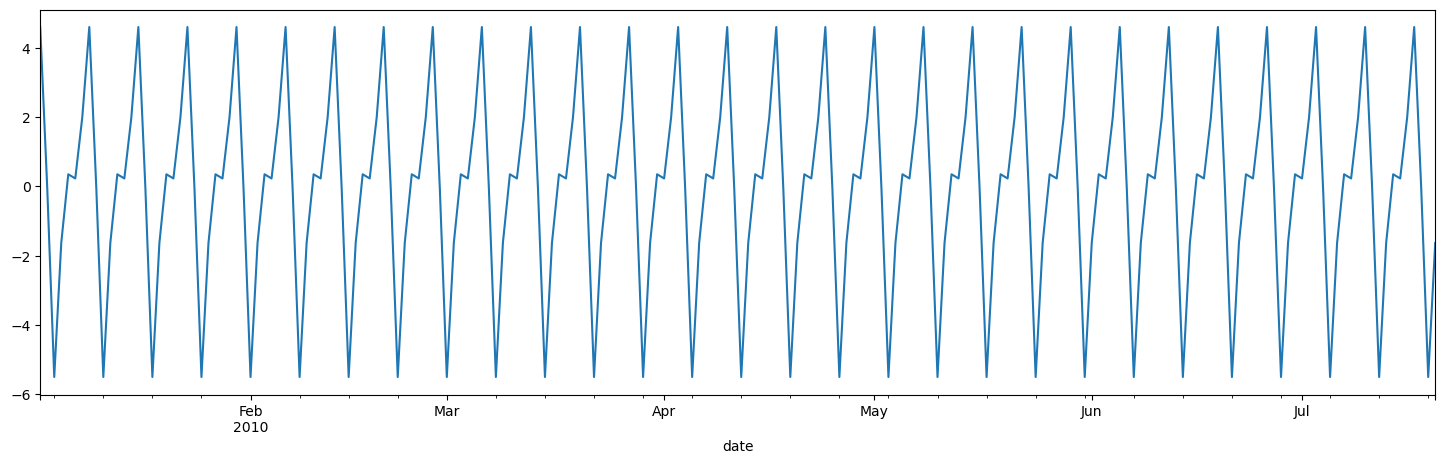

In [27]:
rep_saisonnalite = []

rep_n = 0
while len(rep_saisonnalite) != len(pollution):
    rep_saisonnalite.append(saisonnalite[rep_n%p])
    rep_n += 1

df_saisonnalite = pd.DataFrame(rep_saisonnalite, index = pollution.index, columns=["saisonnalite"])
df_saisonnalite["saisonnalite"][0:200].plot(figsize=(18, 5))

### Estimation de la tendance

<Axes: xlabel='date'>

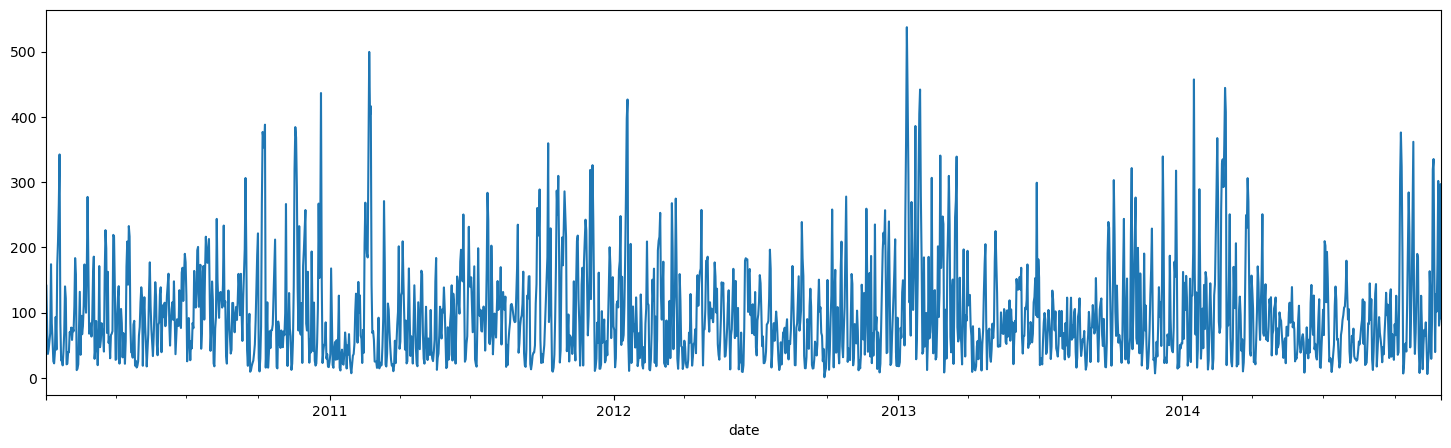

In [29]:
tendance = pollution - rep_saisonnalite

df_tendance = pd.DataFrame(np.array(tendance), index = pollution.index, columns=["tendance"])
df_tendance["tendance"].plot(figsize=(18, 5))